In [2]:
library('Seurat')
library('dplyr')
library('tidyr')
library('ggplot2')
library('Matrix')
library('tibble')
library('RColorBrewer')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




# load object

In [70]:
# obj <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD4T011422.rds")
obj <- readRDS( "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD8Tcleaned020922.rds")


In [72]:
Idents(object = obj) <- "Ident"

In [80]:
unique(Idents(object = obj))

[1] c0(Texme)         c2(CD69+ Tex)     c4(HNRNPH1+ Tex)  c8(HSPD1+ Tex)   
 [5] c1(Tem)           c7(FTL+ Teff)     c5(GZMK+ Teff)    c3(Tn)           
 [9] c9(GNLY+ Teff)    c6(NKT)          
10 Levels: c0(Texme) c2(CD69+ Tex) c4(HNRNPH1+ Tex)  c8(HSPD1+ Tex) ... c6(NKT)

# DEG profiles

In [81]:
levels(obj) <- sort(as.character(unique(Idents(object = obj))))

In [50]:
gene.markers <- FindAllMarkers(obj, min.pct = 0.25)


Calculating cluster c0(Texme)

Calculating cluster c2(CD69+ Tex)

Calculating cluster c4(HNRNPH1+ Tex) 

Calculating cluster c8(HSPD1+ Tex)

Calculating cluster c1(Tem)

Calculating cluster c7(FLT+ Teff)

Calculating cluster c5(GZMK+ Teff)

Calculating cluster c3(Tn)

Calculating cluster c9(GNLY+ Teff)

Calculating cluster c6(NKT)



In [ ]:
# write.csv(gene.markers,"/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD4T_SCT_genemarkers042622.csv" )

In [70]:
# gene.markers <- read.csv("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD8T_SCT_snn_res.0.6_genemarkers.csv" )

In [51]:
head(gene.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
DUSP4,0.000000e+00,0.6682315,0.789,0.573,0.000000e+00,c0(Texme),DUSP4
RPS18,2.301360e-236,-0.6907443,0.977,0.993,4.265801e-232,c0(Texme),RPS18
RGS2,7.057287e-208,0.6839647,0.703,0.536,1.308139e-203,c0(Texme),RGS2
RGS1,2.528867e-182,0.7277427,0.843,0.735,4.687508e-178,c0(Texme),RGS1
RPL3,6.637329e-178,-0.6280296,0.936,0.967,1.230295e-173,c0(Texme),RPL3
CREM,2.019814e-176,0.5681215,0.724,0.584,3.743928e-172,c0(Texme),CREM


In [56]:
top10 <- gene.markers %>% 
    mutate(cluster =factor(gene.markers$cluster,
                              levels=sort(as.character(unique(gene.markers$cluster))))) %>%
    filter(avg_log2FC >0) %>%
    arrange(cluster,p_val_adj) %>%
    group_by(cluster) %>%
    slice(1:10) 

Warning message in DoHeatmap(obj, features = top10$gene, angle = -90):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: TIMP1, CST3, SNORC, S100A13, SERPINE2, S100A16, APOD, PAEP, S100A2, FKBP4, HSPB1, HSPA6, CSTB, LGALS3, TYROBP, NME1, ZBED2, NMB, CRTAM, GNG4, XCL1, TTN, EGR1, HLA-DRA, HAVCR2, VCAM1, METRNL”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



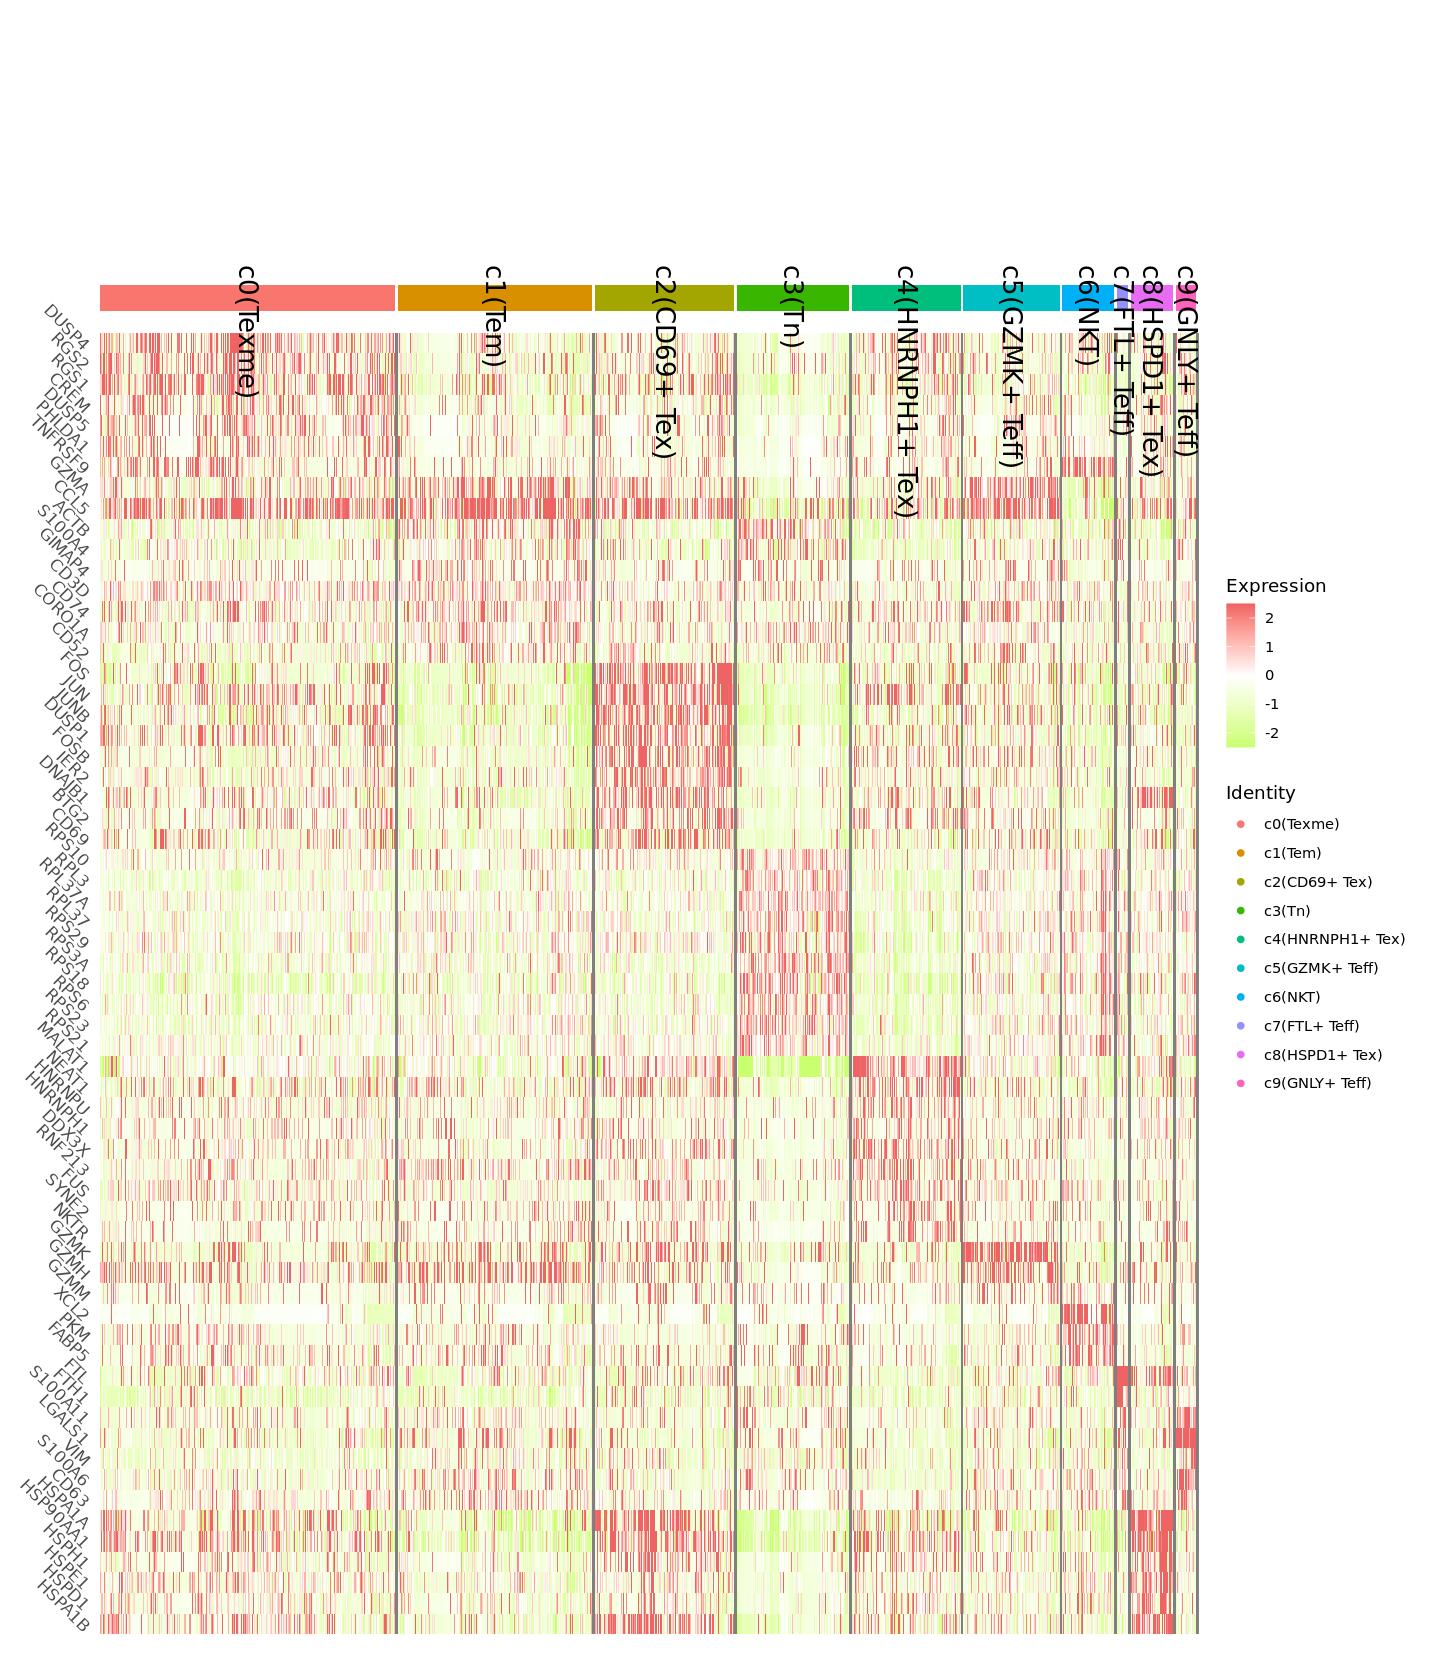

In [83]:
options(repr.plot.height = 14, repr.plot.width = 12)

DoHeatmap(obj, features = top10$gene, angle = -90) +
     scale_fill_gradientn(colors = c("darkolivegreen1", "white", "indianred2"))+
  theme(axis.text.y = element_text(angle=-45, size =10, vjust=1, hjust=1))

# Differential pathways

In [1]:
library(fgsea)
library(repr)

Warning message:
“package ‘repr’ was built under R version 4.1.2”


In [14]:
# Load the pathways into a named list
path = './../../data-lab5/011121_RNAseq/analysisReady'

# pathways.hallmark <- gmtPathways(paste(path, 'GSEA/h.all.v7.1.symbols.gmt', sep = "/" ))
# pathways.KEGG <- gmtPathways(paste(path, 'GSEA/c2.cp.kegg.v7.4.symbols.gmt', sep = "/" ))
pathways.GO <- gmtPathways(paste(path, 'GSEA/c5.go.v7.4.symbols.gmt', sep = "/" ))
# pathways.Immune <- gmtPathways(paste(path, 'GSEA/c7.immunesigdb.v7.4.symbols.gmt', sep = "/" ))

In [58]:
gene.markers.list <- split(gene.markers, gene.markers$cluster)

In [59]:
pathway.list <- vector(mode = "list", length = 8) #length(unique(Idents(obj))))

for (i in names(gene.markers.list)) {
    sc_ranks <- gene.markers.list[[i]] %>% 
    dplyr::select(c('gene','avg_log2FC')) %>%
    drop_na() %>%
    deframe()

    pathway.list[[i]] <- fgsea(pathways=c(pathways.GO) , stats=sc_ranks)
    }

Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


In [60]:
pathways <- bind_rows(pathway.list, .id = "cluster")

In [61]:
pathways%>%
    filter( NES >0 & padj <0.1) %>%
    arrange(padj) %>%
    group_by(cluster) %>%
    slice(1:10) -> top10pathways

In [62]:
pathways.plot <- pathways %>%
 filter(pathway %in% top10pathways$pathway) 
pathways.plot$pathway <- factor(pathways.plot$pathway,levels = unique(top10pathways$pathway))

In [76]:
pathways.plot[pathways.plot$cluster == 'c7(FLT+ Teff)']$cluster <- 'c7(FTL+ Teff)'

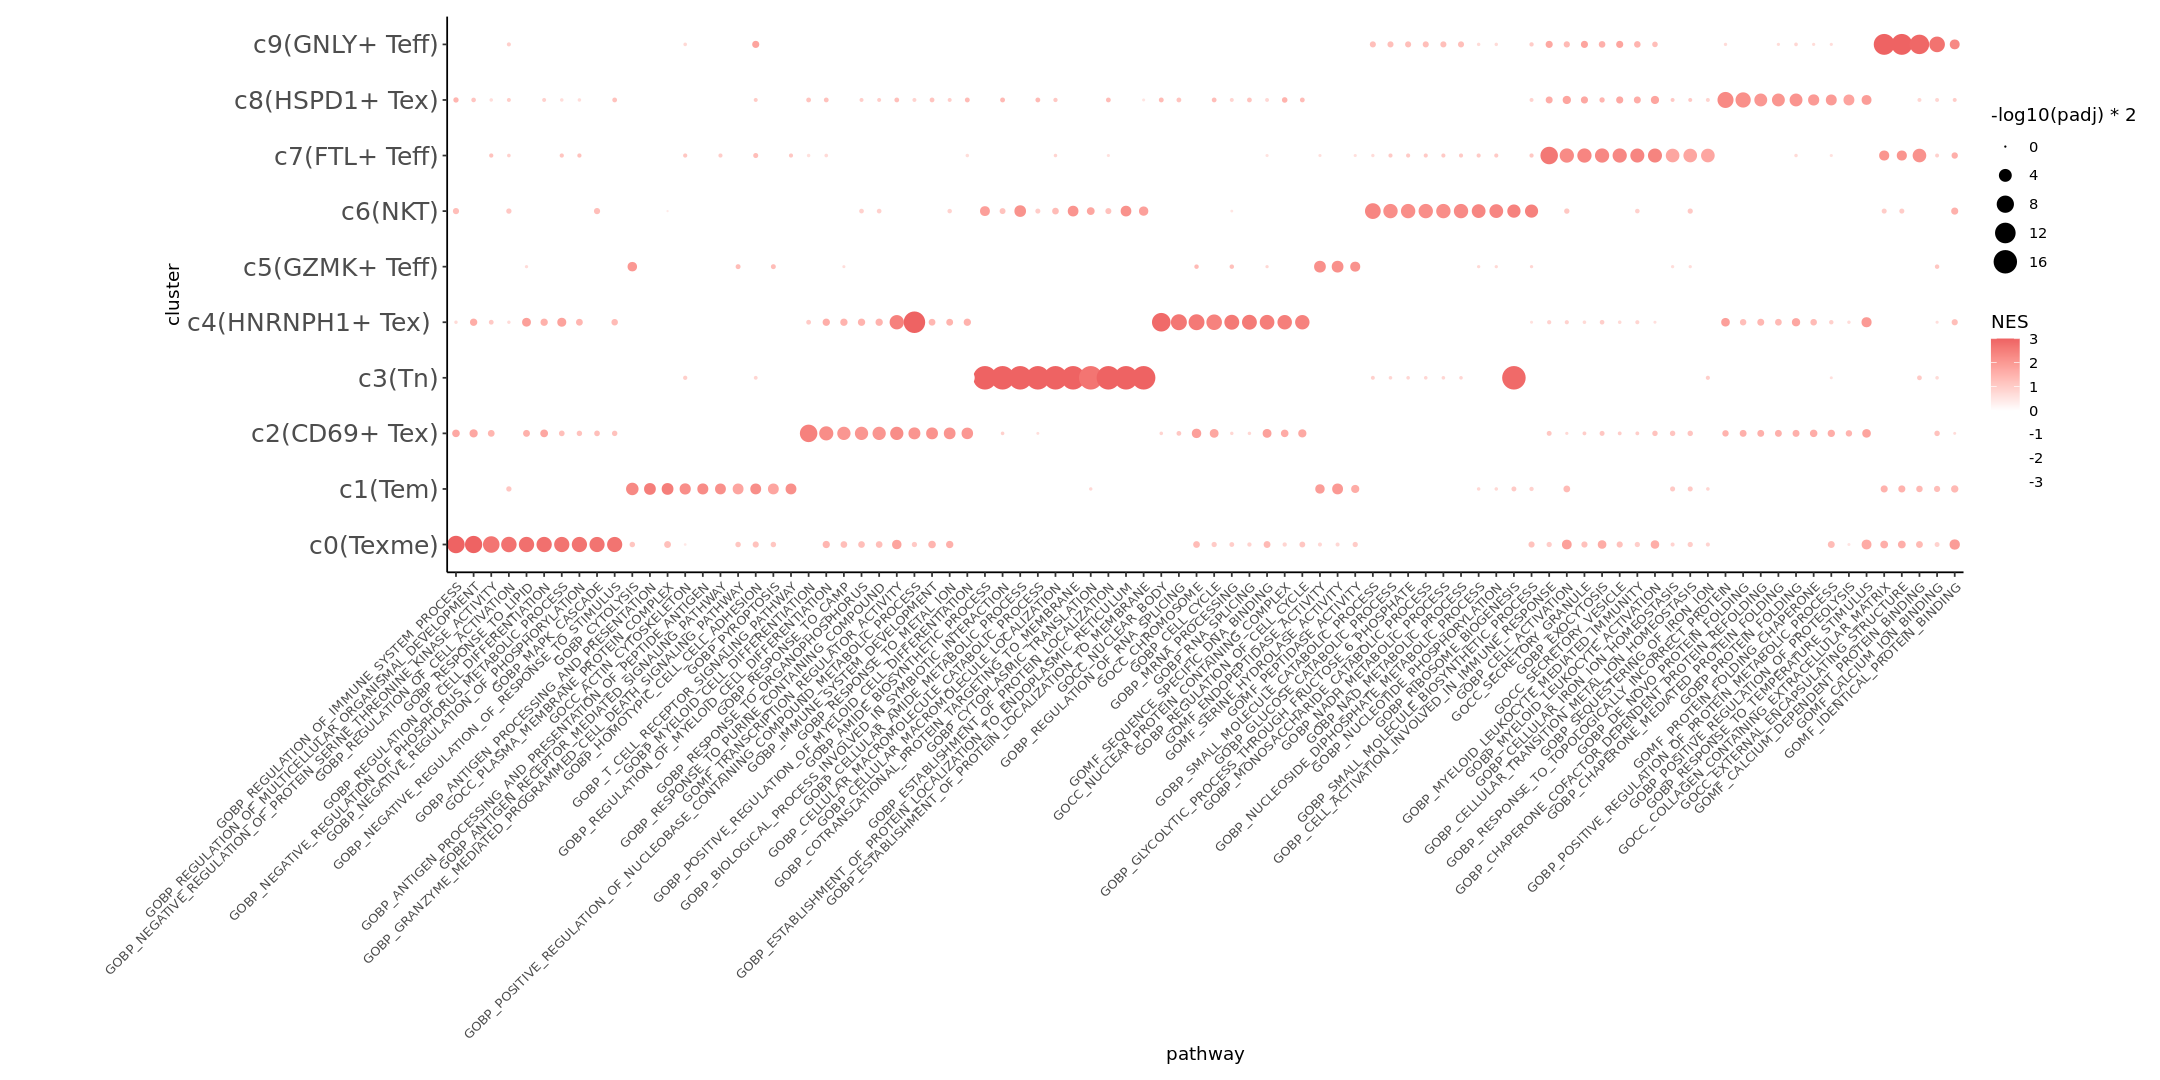

In [77]:
options(repr.plot.width=18, repr.plot.height=9)
pathways.plot %>%
 ggplot(aes(pathway, cluster, col=NES)) +scale_size_area()+
 geom_tile(col="white", fill="white") + 
 geom_point(aes(size = -log10(padj)*2)) +
 theme_classic()+
 scale_color_gradient2(mid="white",low="white",high="indianred2", limits = c(-3,3), oob = scales::squish)+
 scale_x_discrete(expand=c(0,0)) +
 scale_y_discrete(expand=c(0,0)) +
  theme(axis.text.x = element_text(angle=45, size =8,  hjust=1, vjust=1), 
        axis.text.y = element_text( size =15), 
       plot.margin = margin(10, 10, 10, 100))

## PCA on pathways

In [26]:
library(ggfortify)


ERROR: Error in library(ggfortify): there is no package called ‘ggfortify’


In [27]:
pathways.wide <- pathways %>% as.data.frame() %>%
    select(c('cluster','pathway','NES')) %>%
    spread( key = pathway, value = NES) %>% 
    column_to_rownames('cluster') %>%
    select_if(~ !any(is.na(.)))


In [ ]:
pathways.pca <- prcomp(pathways.wide, scale. = TRUE)

In [ ]:
options(repr.plot.height = 6, repr.plot.width = 6)
# autoplot(pathways.pca, label = TRUE)+ theme(text = element_text(size = 10))
autoplot(pathways.pca, label = TRUE, label.size = 10)+theme_bw()
